In [119]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


In [159]:
### x = [x, y, theta, phi]
def f(x): return np.array([np.sin(x[2])*np.cos(x[2])*x[1]**2,
                          -2/np.tan(x[2])*x[0]*x[1],
                          x[0],
                          x[1]])

Both methods do not appear to support plotting geodesics passing through either the x or y planes.

# Shooting Method

The shooting method gives detailed velocity data. The drawback is that it does not always converge, especially when the distant point crosses more than one axes. The detailed velocity data is useful for computing parallel transport. 

In [329]:
def var_search (x0a,r1,r2,N):
    
    _r1 = r1/np.linalg.norm(r1, ord=2)
    _r2 = r2/np.linalg.norm(r2, ord=2)
    
    _r3 = (_r2-_r1)/np.linalg.norm(r1-r2)
    r3 
    
    x0b = np.zeros(4)
    
    x0b[0] = x0a[0]
    x0b[1] = x0a[1]
    # if r1[0] < 0:
    #     x0b[3] = np.arctan(r1[1]/r1[0])-np.pi
    # else :
    #     x0b[3] = np.arctan(r1[1]/r1[0])
    # x0b[2] = np.arccos(r1[2])
    
    x0b[2] = np.arccos(_r1[2])
    x0b[3] = np.sign(_r1[1])*np.arccos(_r1[0]/np.sqrt(_r1[0]**2+_r1[1]**2))    
    
    t = np.linspace(0,x0a[2],N)
    N = t.size
    x = np.zeros((4,N))
    
    x[:,0] = x0b
    
    k = np.zeros((4,4))
    h = t[1]-t[0]

    for i in range(1, t.size):
        
        k[:,0] = f(x[:,i-1])
        
        k[:,1] = f(x[:,i-1] + h/2*k[:,0])
    
        k[:,2] = f(x[:,i-1] + h/2*k[:,1])
    
        k[:,3] = f(x[:,i-1] + h*k[:,2])
    
        x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    u = np.cos(x[3,-1])*np.sin(x[2,-1])
    v = np.sin(x[3,-1])*np.sin(x[2,-1])
    w = np.cos(x[2,-1])
    rf = np.array([u,v,w])

    return np.linalg.norm(_r2-rf, ord=2)

Input points below.

In [346]:
r1 = np.array([-0.8,0.5,0.1])
r2 = np.array([1,-1,-0.2])
N = 5001


r1 = r1/np.linalg.norm(r1, ord=2)
r2 = r2/np.linalg.norm(r2, ord=2)

r3 = (r2-r1)/np.linalg.norm(r1-r2)

x0 = np.zeros(3)

x0[0] = -np.sin(r3[2])
x0[1] = 0.1
x0[2] = 1

rez = sp.optimize.minimize(var_search, x0, args=(r1,r2,N), method='Nelder-Mead', bounds=[(-10,10),(-10,10),(0,10)])

In [347]:
def RK4 (f, x0, t):
    
    N = t.size
    x = np.zeros((4,N))
    
    x[:,0] = x0[:]
    
    k = np.zeros((4,4))
    h = t[1]-t[0]

    for i in range(1, t.size):
        
        k[:,0] = f(x[:,i-1])
        
        k[:,1] = f(x[:,i-1] + h/2*k[:,0])
    
        k[:,2] = f(x[:,i-1] + h/2*k[:,1])
    
        k[:,3] = f(x[:,i-1] + h*k[:,2])
    
        x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    return x

In [360]:
phi0 = np.sign(r1[1])*np.arccos(r1[0]/np.sqrt(r1[0]**2+r1[1]**2))
theta0 = np.arccos(r1[2])
x0c = np.array([rez.x[0], rez.x[1], theta0, phi0])
t = np.linspace(0,rez.x[2],N*10)
s = RK4(f,x0c,t)

In [362]:
u = np.cos(s[3])*np.sin(s[2])
v = np.sin(s[3])*np.sin(s[2])
w = np.cos(s[2])

In [363]:
print('Distant point:          [{0:0.3f}, {1:0.3f}, {2:0.3f}]'.format(*r2))
print('Final calculated point: [{0:0.3f}, {1:0.3f}, {2:0.3f}]'.format(u[-1],v[-1],w[-1]))


Distant point:          [0.700, -0.700, -0.140]
Final calculated point: [0.700, -0.700, -0.140]


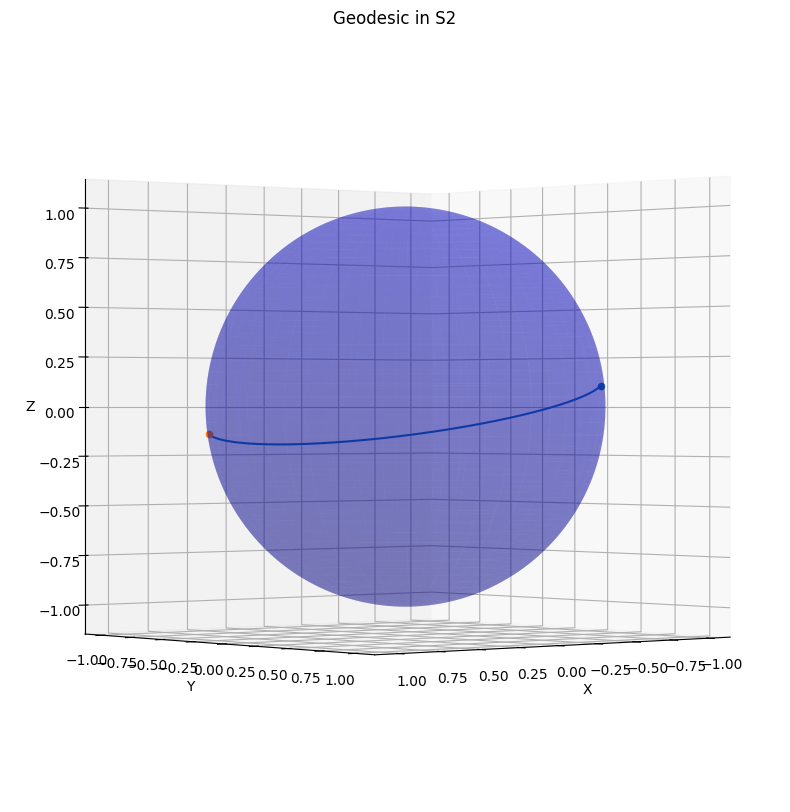

In [364]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
x, y, z = sphere()

# Plot the surface of the sphere
ax.plot_surface(x, y, z, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Geodesic in S2')

ax.plot(u,v,w)
ax.scatter(*r1)
ax.scatter(*r2)
ax.view_init(elev=0, azim=50)

# Show the plot
plt.show();

## Parallel Transport

In [365]:
### x = [x, y, theta, phi], t = s

def g(y,x): ### y = [theta', phi']
    return np.array([np.sin(x[2])*np.cos(x[2])*y[1]*x[1],
                      -(np.cos(x[2])/np.sin(x[2])*y[0]*x[1]+np.cos(x[2])/np.sin(x[2])*y[1]*x[0])])
    
def parallel_transport(A0,t,s):

    N=t.size
    y = np.zeros((A0.size,N))
    
    y[:,0] = A0[:]
    
    k = np.zeros((A0.size,4))
    h = t[1]-t[0]
    
    for i in range(1, N):
        
        k[:,0] = g(y[:,i-1], s[:,i-1])
        
        k[:,1] = g(y[:,i-1] + h/2*k[:,0], (s[:,i]+s[:,i-1])/2)
    
        k[:,2] = g(y[:,i-1] + h/2*k[:,1], (s[:,i]+s[:,i-1])/2)
    
        k[:,3] = g(y[:,i-1] + h*k[:,2], s[:,i])
    
        y[:,i] = y[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    return y

In [371]:
s[2][::1500]
s[3][::1500]
A0 = np.array([1,0])
y = parallel_transport(A0,t,s)
y[:,::1500]

array([1.46519089, 1.48010161, 1.49568551, 1.51182501, 1.52839947,
       1.54528594, 1.56235987, 1.57949574, 1.59656774, 1.61345036,
       1.63001906, 1.64615094, 1.66172538, 1.67662487, 1.69073573,
       1.70394902, 1.71616138, 1.72727606, 1.73720379, 1.74586387,
       1.75318501, 1.75910632, 1.76357809, 1.7665625 , 1.76803417,
       1.76798053, 1.76640205, 1.7633122 , 1.75873724, 1.75271585,
       1.74529855, 1.736547  , 1.72653315, 1.71533837])

array([2.58299334, 2.6695293 , 2.75582589, 2.84191694, 2.92784207,
       3.01364545, 3.09937459, 3.18507903, 3.27080894, 3.35661384,
       3.44254119, 3.52863512, 3.61493514, 3.70147501, 3.78828166,
       3.87537429, 3.96276368, 4.05045164, 4.13843084, 4.22668479,
       4.31518824, 4.40390784, 4.4928031 , 4.58182767, 4.67093084,
       4.76005923, 4.8491586 , 4.9381757 , 5.02706007, 5.11576573,
       5.20425266, 5.29248804, 5.38044721, 5.46811434])

array([[ 1.00000000e+00,  9.99964000e-01,  9.99877760e-01,
         9.99770877e-01,  9.99668151e-01,  9.99588822e-01,
         9.99546014e-01,  9.99546353e-01,  9.99589790e-01,
         9.99669593e-01,  9.99772544e-01,  9.99879310e-01,
         9.99965013e-01,  9.99999990e-01,  9.99950747e-01,
         9.99781102e-01,  9.99453496e-01,  9.98930449e-01,
         9.98176132e-01,  9.97157981e-01,  9.95848308e-01,
         9.94225825e-01,  9.92276998e-01,  9.89997160e-01,
         9.87391304e-01,  9.84474506e-01,  9.81271940e-01,
         9.77818487e-01,  9.74157939e-01,  9.70341866e-01,
         9.66428189e-01,  9.62479555e-01,  9.58561587e-01,
         9.54741106e-01],
       [ 0.00000000e+00, -8.52027801e-03, -1.56795913e-02,
        -2.14427092e-02, -2.57833848e-02, -2.86831334e-02,
        -3.01302349e-02, -3.01190318e-02, -2.86495673e-02,
        -2.57275885e-02, -2.13649131e-02, -1.55801370e-02,
        -8.39963509e-03,  1.41213479e-04,  9.99666972e-03,
         2.11092615e-02,  3.34

In [385]:
Y = np.array([-y[0]*np.sin(s[2])*np.sin(s[3])+y[1]*np.cos(s[2])*np.cos(s[3]),
              y[0]*np.cos(s[2])*np.sin(s[3])+y[1]*np.sin(s[2])*np.cos(s[3]),
              -y[1]*np.sin(s[3])])

In [392]:
e_theta = np.array([np.cos(s[2])*np.cos(s[3]),
              np.cos(s[2])*np.sin(s[3]),
              -np.sin(s[2])])
e_phi = np.array([-np.sin(s[2])*np.sin(s[3]),
              np.sin(s[2])*np.cos(s[3]),
              np.sin(s[2])*0])
for i in range(e_theta.shape[1]):
    e_theta[:,i] = e_theta[:,i]/np.linalg.norm(e_theta[:,i], ord=2)
    e_phi[:,i] = e_phi[:,i]/np.linalg.norm(e_phi[:,i], ord=2)
    
Y = y[0]*e_theta+y[1]*e_phi

In [393]:
y[:,::1500]
np.linalg.norm(Y[:,0],ord=2)
np.linalg.norm(Y[:,-1],ord=2)

array([[ 1.00000000e+00,  9.99964000e-01,  9.99877760e-01,
         9.99770877e-01,  9.99668151e-01,  9.99588822e-01,
         9.99546014e-01,  9.99546353e-01,  9.99589790e-01,
         9.99669593e-01,  9.99772544e-01,  9.99879310e-01,
         9.99965013e-01,  9.99999990e-01,  9.99950747e-01,
         9.99781102e-01,  9.99453496e-01,  9.98930449e-01,
         9.98176132e-01,  9.97157981e-01,  9.95848308e-01,
         9.94225825e-01,  9.92276998e-01,  9.89997160e-01,
         9.87391304e-01,  9.84474506e-01,  9.81271940e-01,
         9.77818487e-01,  9.74157939e-01,  9.70341866e-01,
         9.66428189e-01,  9.62479555e-01,  9.58561587e-01,
         9.54741106e-01],
       [ 0.00000000e+00, -8.52027801e-03, -1.56795913e-02,
        -2.14427092e-02, -2.57833848e-02, -2.86831334e-02,
        -3.01302349e-02, -3.01190318e-02, -2.86495673e-02,
        -2.57275885e-02, -2.13649131e-02, -1.55801370e-02,
        -8.39963509e-03,  1.41213479e-04,  9.99666972e-03,
         2.11092615e-02,  3.34

1.0

1.0009083843019688

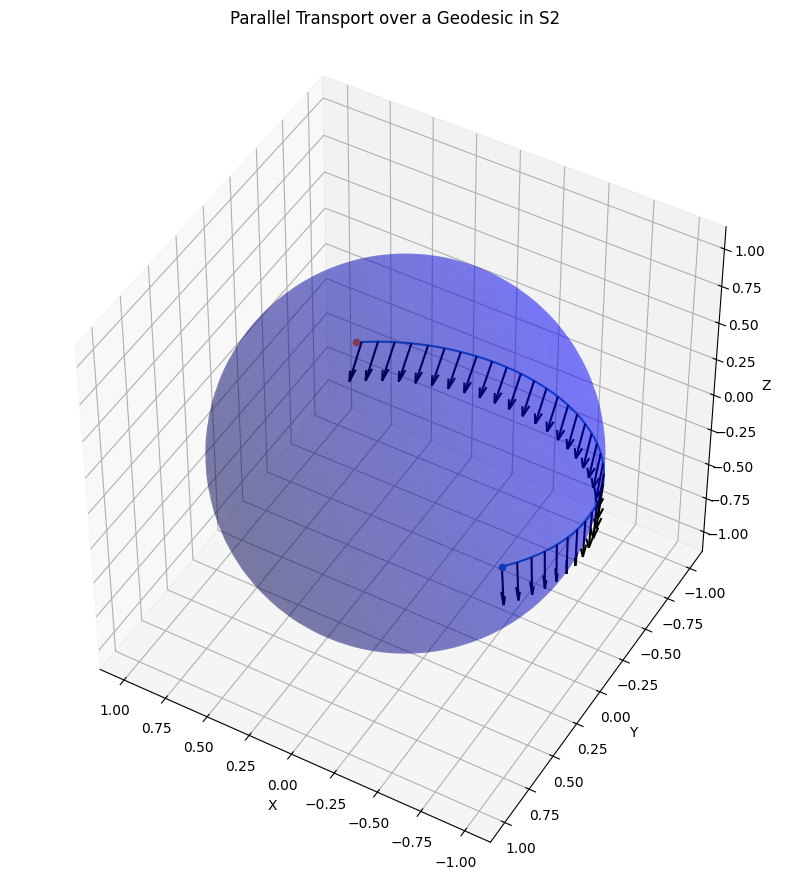

In [394]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
XX, YY, ZZ = sphere()

# Plot the surface of the sphere
ax.plot_surface(XX, YY, ZZ, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Parallel Transport over a Geodesic in S2', pad=40)

ax.plot(u,v,w)
pp = 1500
B = np.array([[u[::pp]],[v[::pp]],[w[::pp]],[Y[0][::pp]],[Y[1][::pp]],[Y[2][::pp]]])
ax.quiver(*B, color='black', length=0.25)
ax.scatter(*r1)
ax.scatter(*r2)
ax.view_init(elev=45, azim=120)

# Show the plot
plt.show();

# Finite Difference Scheme

The finite difference scheme converges nicely with fewer points and in less time than the shooting method in some cases. The drawback is that the velocity data must be then calculated after finding all of the points along the path. The less accurate velocity data creates compounding inaccuracies while computing parallel transport. The finite difference scheme may look like it has found the points along a geodesic without actually converging on the solution properly. This breaks parallel transport calculations.

In [425]:
def finite_difference(x,c): ### needs to be passed interior points only because the boundary values are invariant
                            ### X gets constructed within the routine. Thus, boundary values must be passed as constants.
                            ### always parameterize around 1, so h = 1/X.size
                            ### c = [[theta_i, theta_f],[phi_i,phi_f]]
                            ### x = [[theta_i, phi_i]]
    y = np.zeros(x.size)
    X0 = np.zeros((2,int(x.size/2)+2))
    X = np.zeros((2,int(x.size/2)+2))
    X0[:,0] = c[:,0]
    X0[:,-1] = c[:,-1]
    X0[:,1:-1] = np.array([x[0:int(x.size/2)],x[int(x.size/2):]])
    h = 1/X.size
    for i in range(1,int(x.size/2)+1):
        X[:,i] = func(X0[:,i-1:i+2],h)
    y[0:int(x.size/2)] = X[0,1:-1]
    y[int(x.size/2):] = X[1,1:-1]
    return y

def func(x,h):
    return np.array([(x[0,0]-2*x[0,1]+x[0,2])/h**2-np.sin(x[0,1])*np.cos(x[0,1])*((x[1,2]-x[1,0])/2/h)**2,
                     (np.sin(x[0,1])*x[1,0]-np.sin(x[0,1])*2*x[1,1]+np.sin(x[0,1])*x[1,2])/h**2+2*np.cos(x[0,1])*(x[0,2]*x[1,2]-x[0,2]*x[1,0]-x[0,0]*x[1,2]+x[0,0]*x[1,0])/4/h**2])
    

In [433]:
r1 = np.array([-0.8,0.5,0.1])
r2 = np.array([2,-1,-0.2])
r1 = r1/np.linalg.norm(r1, ord=2)
r2 = r2/np.linalg.norm(r2, ord=2)
r2
c = np.array([[np.arccos(r1[2]), np.arccos(r2[2])],
              [np.sign(r1[1])*np.arccos(r1[0]/np.sqrt(r1[0]**2+r1[1]**2)), np.sign(r2[1])*np.arccos(r2[0]/np.sqrt(r2[0]**2+r2[1]**2))]])

n = 500                          ### interior points
t = np.linspace(0,1,n)
u0 = r1[0]*(1-t)+r2[0]*t
v0 = r1[1]*(1-t)+r2[1]*t
w0 = r1[2]*(1-t)+r2[2]*t

x0 = np.zeros((n*2-4))

x0[0:n-2] = np.arccos(w0)[1:-1]
# np.where(u0<0,np.arctan(v0/u0)-np.pi,np.arctan(v0/u0))[1:-1]
x0[n-2:] = (np.sign(v0)*np.arccos(u0/np.sqrt(u0**2+v0**2)))[1:-1]
# np.arccos(w0)[1:-1]

array([ 0.89087081, -0.4454354 , -0.08908708])

In [434]:
rez = sp.optimize.root(finite_difference, x0, args=(c), method='hybr')
rez

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.279e-10  8.886e-11 ... -1.004e-10  4.003e-12]
       x: [ 1.464e+00  1.463e+00 ... -4.516e-01 -4.576e-01]
  method: hybr
    nfev: 1020
    fjac: [[-8.944e-01  4.472e-01 ...  4.427e-10  4.442e-10]
           [-3.586e-01 -7.171e-01 ...  1.882e-09  1.888e-09]
           ...
           [ 2.820e-06  5.639e-06 ...  6.001e-03  9.978e-01]
           [ 2.533e-04  5.066e-04 ... -1.108e-02 -1.140e-02]]
       r: [ 2.236e+06 -1.789e+06 ... -1.982e+06  1.167e+04]
     qtf: [-1.389e-10  7.002e-12 ... -1.967e-10  1.433e-08]

In [435]:
x = rez.x

X = np.zeros((2,int(x.size/2)+2))
X[:,0] = c[:,0]
X[:,-1] = c[:,-1]
X[:,1:-1] = np.array([x[0:int(x.size/2)],x[int(x.size/2):]])
u = np.cos(X[1])*np.sin(X[0])
v = np.sin(X[1])*np.sin(X[0])
w = np.cos(X[0])
u[-1]
v[-1]
w[-1]

0.8908708063747479

-0.445435403187374

-0.08908708063747489

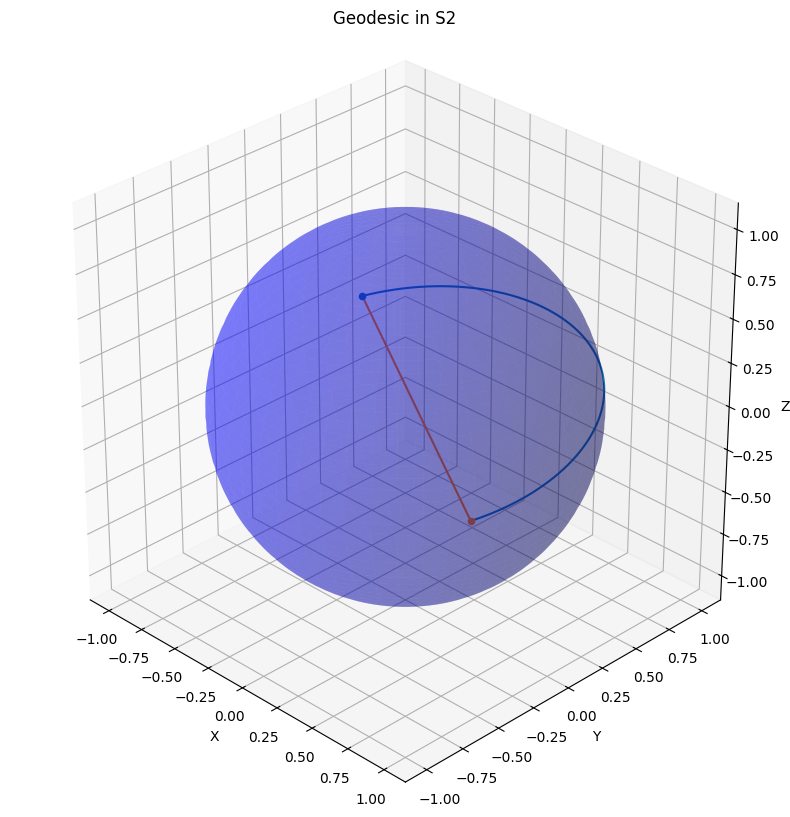

In [436]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
x, y, z = sphere()

# Plot the surface of the sphere
ax.plot_surface(x, y, z, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Geodesic in S2')

ax.plot(u,v,w)
ax.plot(u0,v0,w0)
ax.scatter(*r1)
ax.scatter(*r2)
ax.view_init(elev=30, azim=-45, roll=0)

# Show the plot
plt.show();

## Parallel Transport

In [437]:
Y = np.zeros(X.shape)
h=t[1]-t[0]
for i in range(X.shape[1]-1):
    Y[:,i] = (X[:,i+1]-X[:,i])/h

In [442]:
s = np.array([Y[0],Y[1],X[0],X[1]])
A0 = np.array([1,-1])
A0 = A0/np.linalg.norm(A0,ord=2)
y = parallel_transport(A0,t,s)
# Y = np.array([-y[0]*np.sin(s[2])*np.sin(s[3])+y[1]*np.cos(s[2])*np.cos(s[3]),
#               y[0]*np.cos(s[2])*np.sin(s[3])+y[1]*np.sin(s[2])*np.cos(s[3]),
#               -y[1]*np.sin(s[3])])
e_theta = np.array([np.cos(s[2])*np.cos(s[3]),
              np.cos(s[2])*np.sin(s[3]),
              -np.sin(s[2])])
e_phi = np.array([-np.sin(s[2])*np.sin(s[3]),
              np.sin(s[2])*np.cos(s[3]),
              np.sin(s[2])*0])
for i in range(e_theta.shape[1]):
    e_theta[:,i] = e_theta[:,i]/np.linalg.norm(e_theta[:,i], ord=2)
    e_phi[:,i] = e_phi[:,i]/np.linalg.norm(e_phi[:,i], ord=2)
    
Y = y[0]*e_theta+y[1]*e_phi

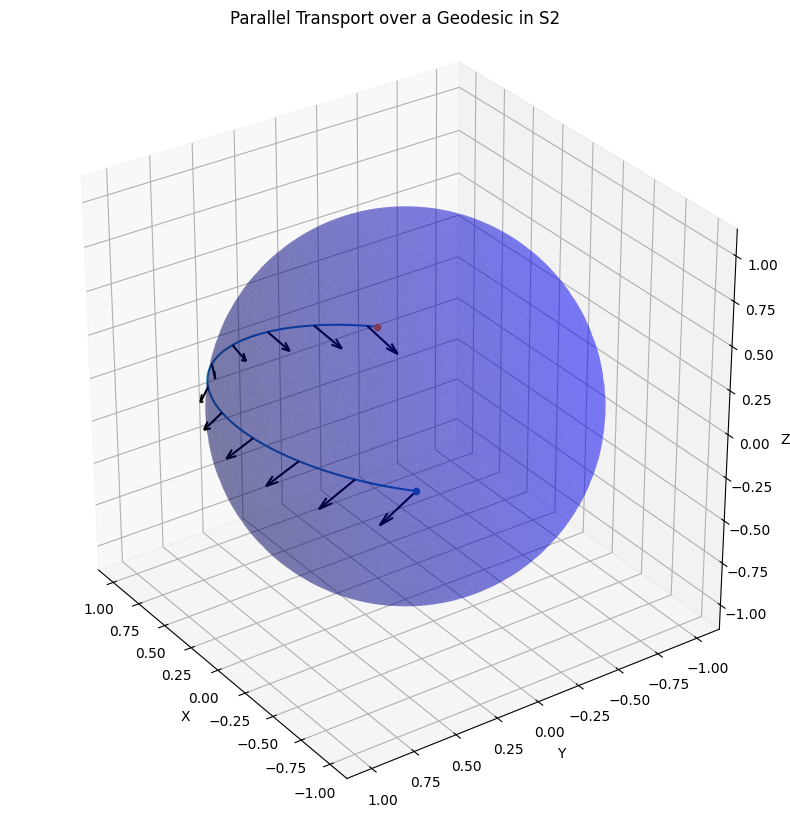

In [445]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
XX, YY, ZZ = sphere()

# Plot the surface of the sphere
ax.plot_surface(XX, YY, ZZ, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Parallel Transport over a Geodesic in S2')

ax.plot(u,v,w)
pp = 49
B = np.array([[u[::pp]],[v[::pp]],[w[::pp]],[Y[0][::pp]],[Y[1][::pp]],[Y[2][::pp]]])
ax.quiver(*B, color='black', length=0.25)
ax.scatter(*r1)
ax.scatter(*r2)
ax.view_init(elev=30, azim=145)

# Show the plot
plt.show();

In [416]:
x0c = np.array([1, 1, 1, 0.5])
t = np.linspace(0,5,50000)
s = RK4(f,x0c,t)

In [417]:
u = np.cos(s[3])*np.sin(s[2])
v = np.sin(s[3])*np.sin(s[2])
w = np.cos(s[2])

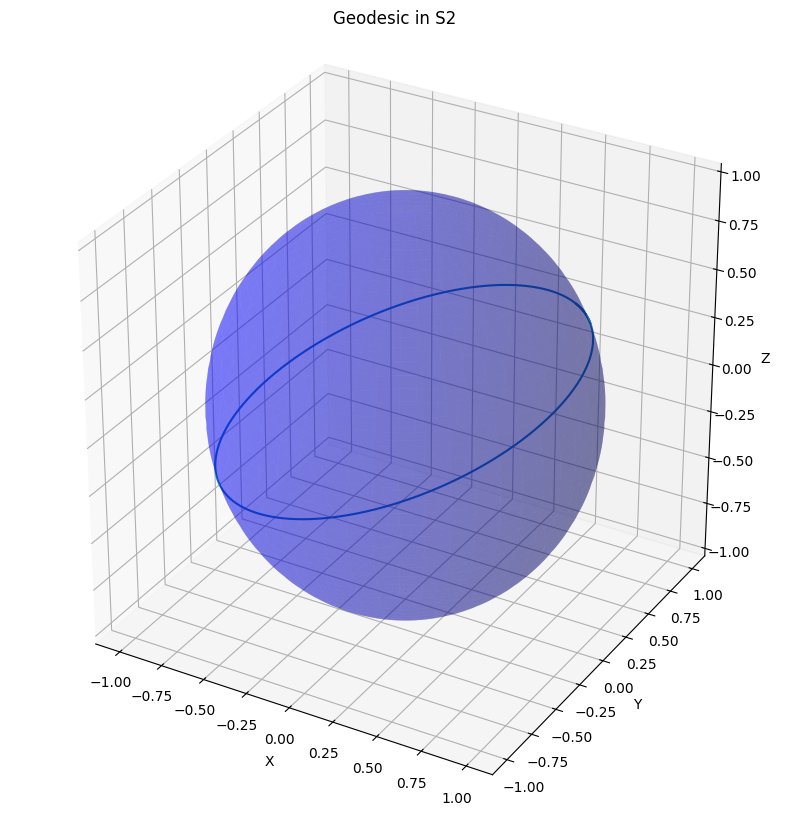

In [418]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
x, y, z = sphere()

# Plot the surface of the sphere
ax.plot_surface(x, y, z, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Geodesic in S2')

ax.plot(u,v,w)

# Show the plot
plt.show();

In [419]:
A0 = np.array([1,0])
y = parallel_transport(A0,t,s)

In [410]:
Y = np.array([-y[0]*np.sin(s[2])*np.sin(s[3])+y[1]*np.cos(s[2])*np.cos(s[3]),
              y[0]*np.cos(s[2])*np.sin(s[3])+y[1]*np.sin(s[2])*np.cos(s[3]),
              -y[1]*np.sin(s[3])])

In [420]:
e_theta = np.array([np.cos(s[2])*np.cos(s[3]),
              np.cos(s[2])*np.sin(s[3]),
              -np.sin(s[2])])
e_phi = np.array([-np.sin(s[2])*np.sin(s[3]),
              np.sin(s[2])*np.cos(s[3]),
              np.sin(s[2])*0])
for i in range(e_theta.shape[1]):
    e_theta[:,i] = e_theta[:,i]/np.linalg.norm(e_theta[:,i], ord=2)
    e_phi[:,i] = e_phi[:,i]/np.linalg.norm(e_phi[:,i], ord=2)
    
Y = y[0]*e_theta+y[1]*e_phi

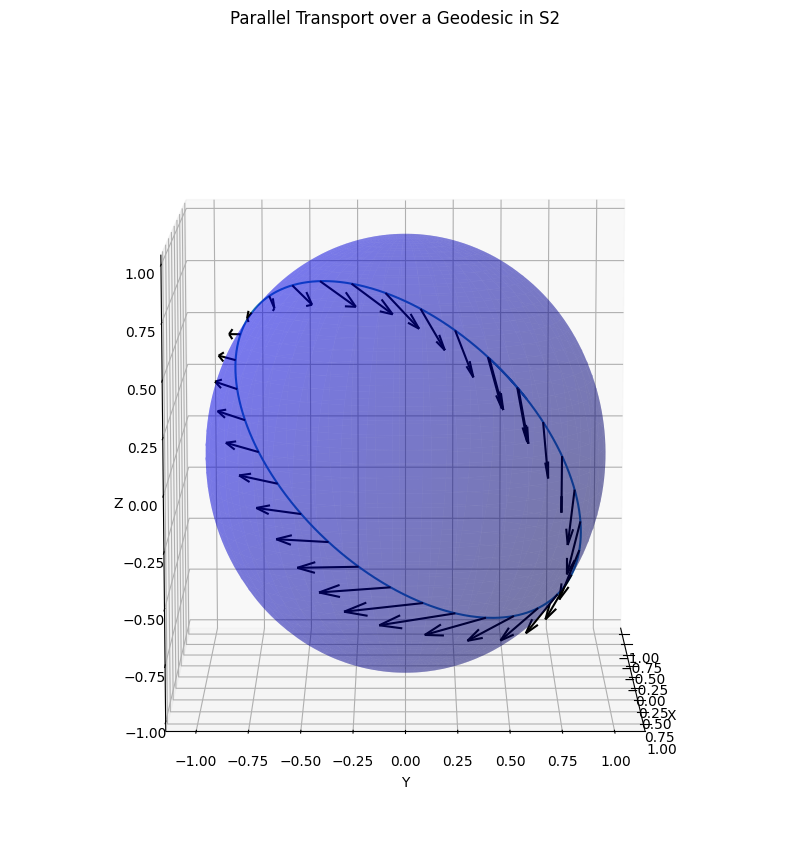

In [422]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
XX, YY, ZZ = sphere()

# Plot the surface of the sphere
ax.plot_surface(XX, YY, ZZ, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Parallel Transport over a Geodesic in S2', pad=40)

ax.plot(u,v,w)
pp = 1500
B = np.array([[u[::pp]],[v[::pp]],[w[::pp]],[Y[0][::pp]],[Y[1][::pp]],[Y[2][::pp]]])
ax.quiver(*B, color='black', length=0.25)
ax.view_init(elev=10, azim=0)

# Show the plot
plt.show();